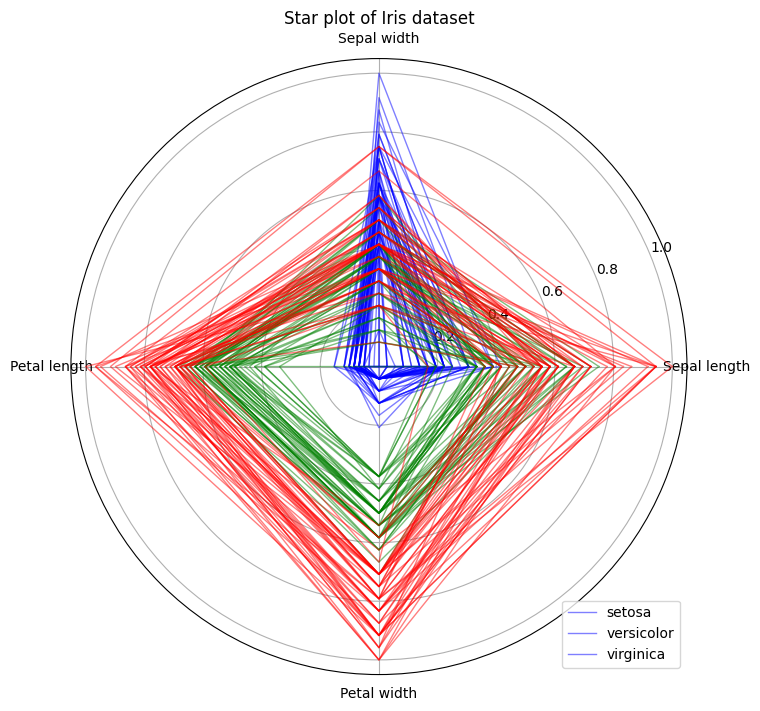

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data # 150 x 4 matrix of observations
y = iris.target # 150 x 1 vector of labels
labels = iris.target_names # 3 x 1 vector of species names

# Standardize the data by column
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Define the number of variables and the number of observations
n_vars = X.shape[1]
n_obs = X.shape[0]

# Define the angles for the spokes of the star plot
angles = np.linspace(0, 2 * np.pi, n_vars, endpoint=False)

# Repeat the first angle to close the circle
angles = np.concatenate((angles, [angles[0]]))

# Define the figure size and layout
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each observation as a star
for i in range(n_obs):
    # Repeat the first coordinate to close the circle
    values = np.concatenate((X[i], [X[i][0]]))
    # Choose a different color for each species
    if y[i] == 0:
        color = "blue"
    elif y[i] == 1:
        color = "green"
    else:
        color = "red"
    # Plot the star with a thin line and no fill
    ax.plot(angles, values, color=color, linewidth=1, alpha=0.5)

# Add labels for the variables
ax.set_xticks(angles[:-1])
ax.set_xticklabels(["Sepal length", "Sepal width", "Petal length", "Petal width"])

# Add a title and a legend
plt.title("Star plot of Iris dataset")
plt.legend(labels, loc="lower right")

# Show the plot
plt.show()


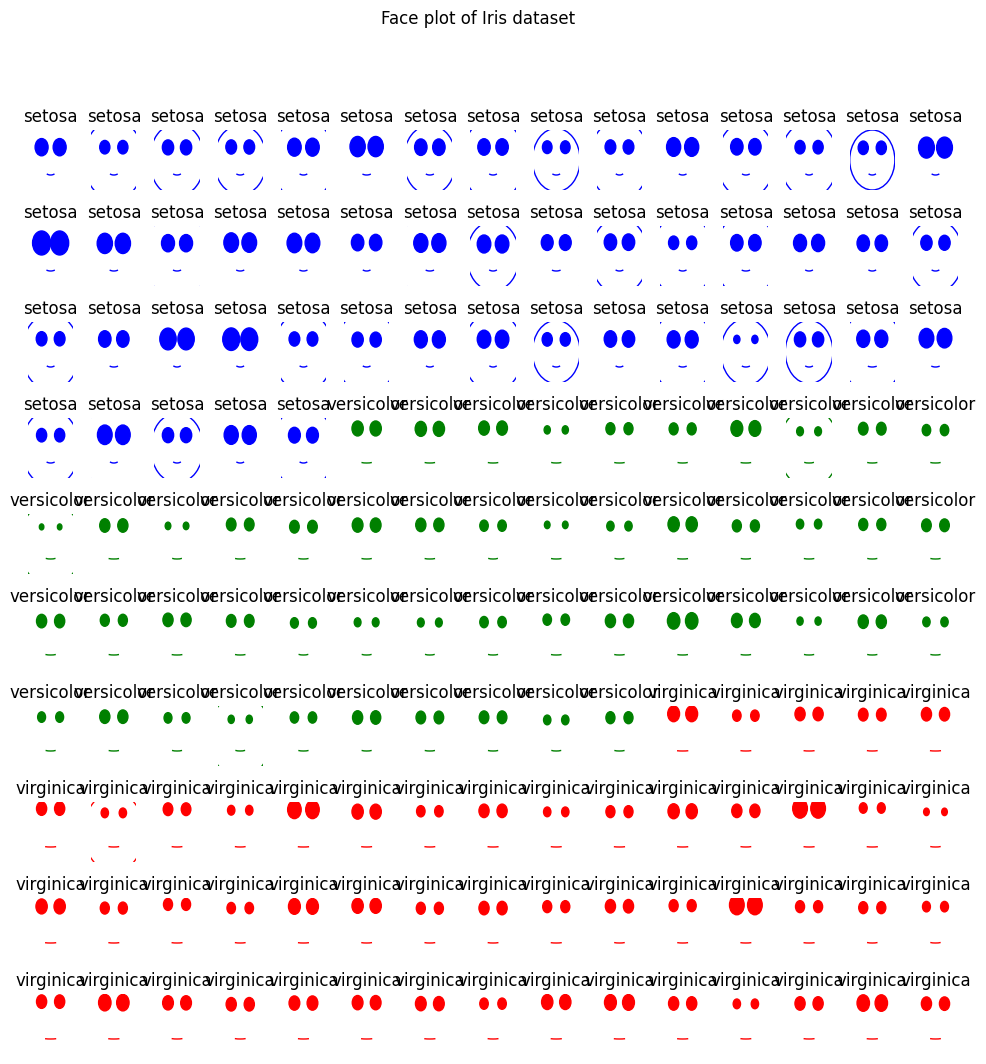

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib import patches

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data # 150 x 4 matrix of observations
y = iris.target # 150 x 1 vector of labels
labels = iris.target_names # 3 x 1 vector of species names

# Standardize the data by column
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Define the number of variables and the number of observations
n_vars = X.shape[1]
n_obs = X.shape[0]

# Define the features for the face plot
features = [
    {"name": "head size", "index": 0, "type": "size", "range": (0.5, 1.5)},
    {"name": "eye size", "index": 1, "type": "size", "range": (0.05, 0.2)},
    {"name": "eye position", "index": 2, "type": "position", "range": (0.2, 0.4)},
    {"name": "mouth size", "index": 3, "type": "size", "range": (0.2, 0.6)},
]

# Define a function to map a value to a range
def map_to_range(x, range):
    return x * (range[1] - range[0]) + range[0]

# Define the figure size and layout
fig, ax = plt.subplots(figsize=(12, 12), nrows=10, ncols=15)

# Plot each observation as a face
for i in range(n_obs):
    # Get the row and column index for the subplot
    row = i // 15
    col = i % 15
    # Get the values for the features
    values = X[i]
    # Choose a different color for each species
    if y[i] == 0:
        color = "blue"
    elif y[i] == 1:
        color = "green"
    else:
        color = "red"
    # Plot the face with the features
    for feature in features:
        # Get the feature name, index, type, and range
        name = feature["name"]
        index = feature["index"]
        type = feature["type"]
        range = feature["range"]
        # Map the value to the range
        value = map_to_range(values[index], range)
        # Draw the feature according to the type
        if name == "head size":
            # Draw a circle for the head
            head = patches.Circle((0.5, 0.5), radius=value, color=color, fill=False)
            ax[row, col].add_patch(head)
        elif name == "eye size":
            # Draw two circles for the eyes
            left_eye = patches.Circle((0.3, 0.7), radius=value, color=color, fill=True)
            right_eye = patches.Circle((0.7, 0.7), radius=value, color=color, fill=True)
            ax[row, col].add_patch(left_eye)
            ax[row, col].add_patch(right_eye)
        elif name == "eye position":
            # Move the eyes up or down
            left_eye.center = (0.3, 0.5 + value)
            right_eye.center = (0.7, 0.5 + value)
        elif name == "mouth size":
            # Draw an arc for the mouth
            mouth = patches.Arc((0.5, 0.3), width=value, height=0.1,
                                theta1=200, theta2=340, color=color)
            ax[row, col].add_patch(mouth)
    # Remove the axes and add a title
    ax[row, col].axis("off")
    ax[row, col].set_title(labels[y[i]])

# Add a suptitle and adjust the spacing
plt.suptitle("Face plot of Iris dataset")
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Show the plot
plt.show()
